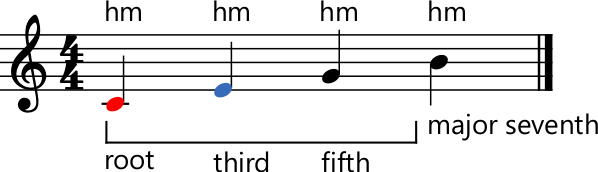

In [31]:
from music21 import *

s = stream.Score()

part = stream.Part()

notes = [
    ("C4", "root"),
    ("E4", "third"),
    ("G4", "fifth"),
    ("B4", "major seventh")
]

for p, a in notes:
    n = note.Note(p, quarterLength=1)

    if p == "C4":
        n.style.color = "red"
    
    if p == "E4":
        n.style.color = "#386aba"
    
    te1 = expressions.TextExpression(a)
    te1.style.justify = "center"
    te1.style.fontSize = 10
    te1.style.fontFamily = "Segoe UI"
    te1.placement = "below"
    part.append(te1)

    te2 = expressions.TextExpression("hm")
    te2.style.fontSize = 10
    te2.style.fontFamily = "Segoe UI"
    te2.placement = "above"
    part.append(te2)

    part.append(n)

cnote = part.recurse().notes[0]
enote = part.recurse().notes[2]
spn = spanner.Line([cnote, enote])
spn.lineType = "solid"
spn.placement = "below"
spn.tick = "up"
part.insert(0.0, spn)

s.append(part)

s.show()

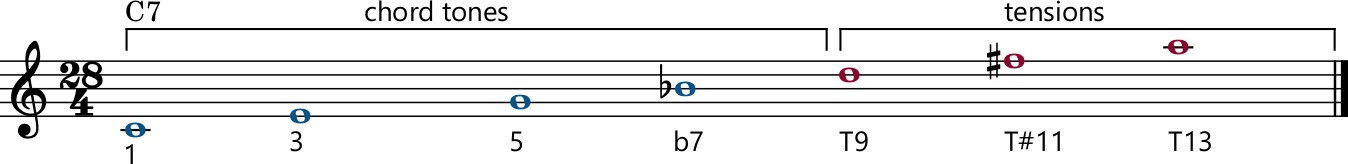

In [37]:
from music21 import *

s = stream.Score()

part = stream.Part()

part.append(meter.TimeSignature("28/4"))

c7_chord = harmony.ChordSymbol("C7")
c7_chord.style.fontFamily = "Segoe UI"

part.append(c7_chord)

notes = [
    ("C4", "1"),
    ("E4", "3"),
    ("G4", "5"),
    ("B-4", "b7"),
    ("D5", "T9"),
    ("F#5", "T#11"),
    ("A5", "T13")
]

for p, a in notes:
    n = note.Note(p, quarterLength=4)
    texp = expressions.TextExpression(a)
    texp.style.fontSize = 10
    texp.style.fontFamily = "Segoe UI"
    texp.placement = "below"
    
    if not "T" in a:
        n.style.color = "#06538a"
    else:
        n.style.color = "#8a062d"
    
    part.append(texp)
    
    part.append(n)

tones_start = part.recurse().notes[1]
tones_end = part.recurse().notes[4]
tones_line = spanner.Line([tones_start, tones_end])
tones_line.lineType = "solid"

tones_texp = expressions.TextExpression("chord tones")
tones_texp.style.fontSize = 10
tones_texp.style.fontFamily = "Segoe UI"
tones_texp.placement = "above"

tens_start = part.recurse().notes[5]
tens_end = part.recurse().notes[7]
tens_line = spanner.Line([tens_start, tens_end])
tens_line.lineType = "solid"

tens_texp = expressions.TextExpression("tensions")
tens_texp.style.fontSize = 10
tens_texp.style.fontFamily = "Segoe UI"
tens_texp.placement = "above"

part.insert(1, tones_line)
part.insert(5, tones_texp)
part.insert(6, tens_line)
part.insert(20, tens_texp)

s.append(part)

s.show()

In [26]:
from music21 import *
from IPython.display import Image


def music(notes: str, midi: bool=False):
    s = stream.Score()
    part = stream.Part()
    
    # get info
    info_start = 5
    
    for i in range(info_start, len(notes)):
        if notes[i:i+5] == "INFO ":
            info_end = i
    
    info = list(filter(lambda x: len(x) > 0, notes[info_start:info_end].split(" ")))
    
    # set clef
    if info[0].lower == "treble":
        part.append(clef.TrebleClef())
    elif info[0].lower == "bass":
        part.append(clef.BassClef())
    
    # set key
    keys = [["cb", -7], ["gb", -6], ["db", -5], ["ab", -4], ["eb", -3], ["bb", -2], ["f", -1], ["c", 0], ["g", 1], ["d", 2], ["a", 3], ["e", 4], ["b", 5], ["f#", 6], ["c#", 7]]
    for k in keys:
        if info[1].lower() == k[0]:
            part.append(key.KeySignature(k[1]))
    
    # set time signature
    part.append(meter.TimeSignature(info[2]))
    
    # add notes
    notes = notes[info_end+5:].split(" ")
    for n in notes:
        # add chord name
        if n[0] == "!":
            part.append(harmony.ChordSymbol(n[1:]))
        # start next measure on a new line
        elif n == "^":
            part.append(layout.SystemLayout(isNew=True))
        else:
            # set variables
            is_chord, is_tie = False, "none"
            # if the note is a chord
            if "(" in n:
                is_chord = True
                # FIX COMMA
                chord_name = n.replace("(", "").replace(")", "").split(", ")
                print(chord_name)
            else:
                if n[-1] == "t":
                    print("yes")
        

notes = "INFO treble eb 4/4 INFO !fm7 b-4h re g4e a-4et c5et e-5et (e-4, g4, b-4, d5)w"
music(notes)

yes
yes
yes
['e-4,']
